<a href="https://colab.research.google.com/github/A-Tetarwal/AI-Lab-7/blob/main/All_codes_combined_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Objective: Basics of data structure needed for state-space search tasks and use of random numbers required for MDP and RL, Understanding Exploitation - Exploration in simple n-arm bandit reinforcement learning task, epsilon-greedy algorithm


Title: Matchbox Educable Naughts and Crosses Engine
Reference: http://people.csail.mit.edu/brooks/idocs/matchbox.pdf

Problems for submission:
Read the reference on MENACE by Michie and check for its implementations.  Pick the one that you like the most and go through the code carefully.  Highlight the parts that you feel are crucial.  If possible, try to code the MENACE in any programming language of your liking.

In [ ]:
import random

# Tic-Tac-Toe Board States
class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9
        self.current_winner = None

    def make_move(self, square, letter):
        if self.board[square] == ' ':
            self.board[square] = letter
            if self.winner(square, letter):
                self.current_winner = letter
            return True
        return False

    def winner(self, square, letter):
        win_conditions = [(0, 1, 2), (3, 4, 5), (6, 7, 8),
                         (0, 3, 6), (1, 4, 7), (2, 5, 8),
                         (0, 4, 8), (2, 4, 6)]
        for combo in win_conditions:
            if all(self.board[i] == letter for i in combo):
                return True
        return False

    def available_moves(self):
        return [i for i, spot in enumerate(self.board) if spot == ' ']

    def is_full(self):
        return ' ' not in self.board

    def print_board(self):
        for row in [self.board[i:i+3] for i in range(0, 9, 3)]:
            print('| ' + ' | '.join(row) + ' |')

# MENACE Implementation
class MENACE:
    def __init__(self):
        self.matchboxes = {}
        self.game_history = []

    def get_moves_for_state(self, board):
        state = ''.join(board)
        if state not in self.matchboxes:
            # Initialize weights only for available moves
            weights = []
            for i in range(9):
                if board[i] == ' ':
                    weights.append(1)
                else:
                    weights.append(0)
            self.matchboxes[state] = weights
        return self.matchboxes[state]

    def make_move(self, board):
        moves = self.get_moves_for_state(board)
        available_moves = [i for i, weight in enumerate(moves) if weight > 0 and board[i] == ' ']

        if not available_moves:
            return None

        weights = [moves[i] for i in available_moves]
        total_weight = sum(weights)

        if total_weight == 0:
            return random.choice([i for i, spot in enumerate(board) if spot == ' '])

        move = random.choices(available_moves, weights=weights)[0]
        self.game_history.append((''.join(board), move))
        return move

    def update_weights(self, result):
        for state, move in self.game_history:
            if state not in self.matchboxes:
                continue

            moves = self.matchboxes[state]
            if result == 'win':
                moves[move] += 3
            elif result == 'loss':
                moves[move] = max(1, moves[move] - 1)
        self.game_history = []  # Clear history after updating

def play_game(menace, player_letter='X'):
    game = TicTacToe()
    turn = 'X'

    while True:
        if game.is_full():
            return 'draw', game.board

        if turn == player_letter:
            available = game.available_moves()
            if available:
                square = random.choice(available)
            else:
                return 'draw', game.board
        else:
            square = menace.make_move(game.board)
            if square is None:
                return 'draw', game.board

        game.make_move(square, turn)

        if game.current_winner:
            return turn, game.board

        turn = 'O' if turn == 'X' else 'X'

# Train MENACE
menace = MENACE()
wins = {'X': 0, 'O': 0, 'draw': 0}

print("Training MENACE...")
for i in range(10000):
    result, final_board = play_game(menace)
    wins[result if result != 'O' and result != 'X' else result] += 1

    if result == 'O':  # MENACE wins
        menace.update_weights('win')
    elif result == 'X':  # MENACE loses
        menace.update_weights('loss')
    else:  # Draw
        menace.update_weights('draw')

    if (i + 1) % 1000 == 0:
        print(f"Completed {i + 1} training games")
        print(f"Wins: {wins['O']}, Losses: {wins['X']}, Draws: {wins['draw']}")

print("\nTraining complete!")
print(f"Final statistics:")
print(f"MENACE wins: {wins['O']}")
print(f"MENACE losses: {wins['X']}")
print(f"Draws: {wins['draw']}")

# Play against MENACE interactively
def play_against_menace():
    game = TicTacToe()
    menace_player = MENACE()

    print("\nPlaying against MENACE")
    print("Enter moves using numbers 0-8 (left to right, top to bottom)")
    print("Current board positions:")
    print("0 | 1 | 2")
    print("---------")
    print("3 | 4 | 5")
    print("---------")
    print("6 | 7 | 8")

    turn = 'X'  # Player is X, MENACE is O

    while True:
        game.print_board()

        if turn == 'X':
            while True:
                try:
                    move = int(input("Enter your move (0-8): "))
                    if 0 <= move <= 8 and game.board[move] == ' ':
                        break
                    else:
                        print("Invalid move, try again.")
                except ValueError:
                    print("Please enter a number between 0 and 8.")

            game.make_move(move, 'X')
        else:
            move = menace_player.make_move(game.board)
            if move is not None:
                game.make_move(move, 'O')
                print(f"MENACE plays position {move}")

        if game.current_winner:
            game.print_board()
            if game.current_winner == 'X':
                print("You win!")
                menace_player.update_weights('loss')
            else:
                print("MENACE wins!")
                menace_player.update_weights('win')
            break

        if game.is_full():
            game.print_board()
            print("It's a draw!")
            menace_player.update_weights('draw')
            break

        turn = 'O' if turn == 'X' else 'X'

    play_again = input("Play again? (y/n): ")
    if play_again.lower() == 'y':
        play_against_menace()

# Start the game
play_against_menace()


Training MENACE...
Completed 1000 training games
Wins: 321, Losses: 566, Draws: 113
Completed 2000 training games
Wins: 775, Losses: 1020, Draws: 205
Completed 3000 training games
Wins: 1283, Losses: 1428, Draws: 289
Completed 4000 training games
Wins: 1820, Losses: 1819, Draws: 361
Completed 5000 training games
Wins: 2406, Losses: 2176, Draws: 418
Completed 6000 training games
Wins: 3021, Losses: 2507, Draws: 472
Completed 7000 training games
Wins: 3669, Losses: 2812, Draws: 519
Completed 8000 training games
Wins: 4327, Losses: 3096, Draws: 577
Completed 9000 training games
Wins: 5015, Losses: 3361, Draws: 624
Completed 10000 training games
Wins: 5694, Losses: 3628, Draws: 678

Training complete!
Final statistics:
MENACE wins: 5694
MENACE losses: 3628
Draws: 678

Playing against MENACE
Enter moves using numbers 0-8 (left to right, top to bottom)
Current board positions:
0 | 1 | 2
---------
3 | 4 | 5
---------
6 | 7 | 8
|   |   |   |
|   |   |   |
|   |   |   |
|   |   |   |
|   |   | 

Consider a binary bandit with two rewards {1-success, 0-failure}.  The bandit returns 1 or 0 for the action that you select, i.e. 1 or 2.  The rewards are stochastic (but stationary).  Use an epsilon-greedy algorithm discussed in class and decide upon the action to take for maximizing the expected reward.  There are two binary bandits named binaryBanditA.m and binaryBanditB.m are waiting for you.


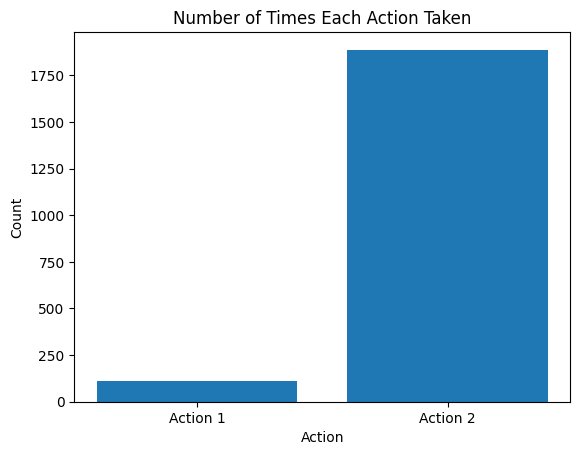

****************** RESULTS FOR BANDIT A *************************
Observed Average Reward for Action 1: 0.17699115044247793
Observed Average Reward for Action 2: 0.5437201907790153
Actual Reward Probability for Action 1: 0.23796462709189137
Actual Reward Probability for Action 2: 0.5442292252959519
***************************************************************


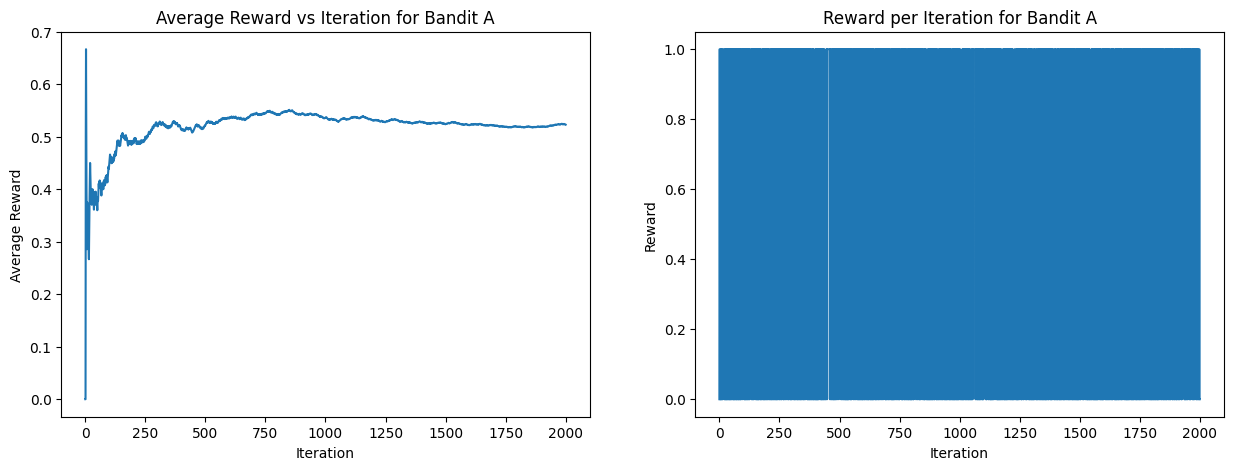

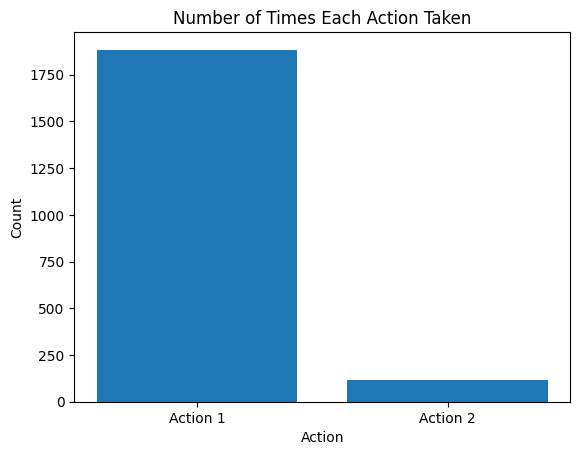

****************** RESULTS FOR BANDIT B *************************
Observed Average Reward for Action 1: 0.48885350318471305
Observed Average Reward for Action 2: 0.33620689655172414
Actual Reward Probability for Action 1: 0.46300735781502145
Actual Reward Probability for Action 2: 0.37331193139504204
***************************************************************


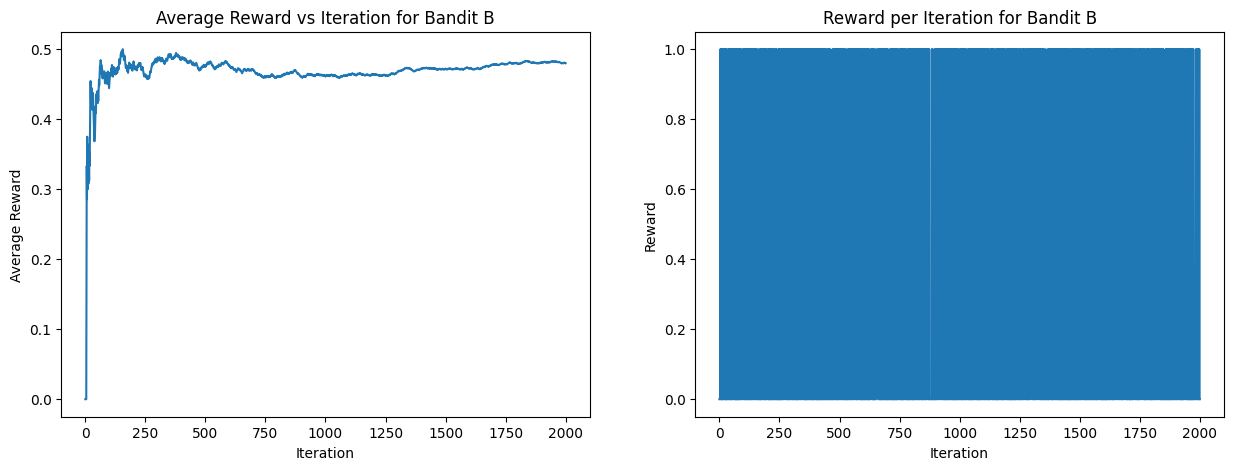

In [ ]:
import random
import matplotlib.pyplot as plt

# --- Binary Bandit ---
class BinaryBandit:
    def __init__(self):
        self.arms = 2  # Number of arms is fixed to 2 for binary bandit
        self.p = [random.random() for _ in range(self.arms)]  # Random success probabilities

    def get_actions(self):
        return list(range(self.arms))  # Actions: 0 or 1

    def get_reward(self, action):
        return 1 if random.random() < self.p[action] else 0  # 1 for success, 0 for failure

# --- Epsilon-Greedy Agent for Binary Bandit ---
def epsilon_greedy_agent(bandit, epsilon, steps):
    num_actions = bandit.arms
    Q_values = [0.0] * num_actions  # Initialize estimated rewards (Q-values)
    action_counts = [0] * num_actions  # Track how many times each action is selected
    rewards_history = []  # Store all rewards over steps
    avg_rewards_history = [0.0]  # Track the running average reward

    for t in range(1, steps + 1):
        # Epsilon-greedy decision
        if random.random() > epsilon:
            action = Q_values.index(max(Q_values))  # Exploit: choose best action
        else:
            action = random.choice(bandit.get_actions())  # Explore: choose a random action

        # Get the reward for the chosen action
        reward = bandit.get_reward(action)
        rewards_history.append(reward)
        action_counts[action] += 1

        # Update estimated Q-value incrementally
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]

        # Update running average reward
        avg_rewards_history.append(avg_rewards_history[t - 1] + (reward - avg_rewards_history[t - 1]) / t)

    # Display action counts
    plt.bar(["Action 1", "Action 2"], action_counts)
    plt.title("Number of Times Each Action Taken")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.show()

    return Q_values, avg_rewards_history, rewards_history

# --- Simulation for Bandit A ---
random.seed(3)
bandit_A = BinaryBandit()
Q_values_A, avg_rewards_A, rewards_A = epsilon_greedy_agent(bandit_A, epsilon=0.1, steps=2000)

# Print results for Bandit A
print("****************** RESULTS FOR BANDIT A *************************")
print(f"Observed Average Reward for Action 1: {Q_values_A[0]}")
print(f"Observed Average Reward for Action 2: {Q_values_A[1]}")
print(f"Actual Reward Probability for Action 1: {bandit_A.p[0]}")
print(f"Actual Reward Probability for Action 2: {bandit_A.p[1]}")
print("***************************************************************")

# Plot the reward trends for Bandit A
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(avg_rewards_A)
ax1.set_title("Average Reward vs Iteration for Bandit A")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(rewards_A)
ax2.set_title("Reward per Iteration for Bandit A")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
plt.show()

# --- Simulation for Bandit B ---
random.seed(9)
bandit_B = BinaryBandit()
Q_values_B, avg_rewards_B, rewards_B = epsilon_greedy_agent(bandit_B, epsilon=0.1, steps=2000)

# Print results for Bandit B
print("****************** RESULTS FOR BANDIT B *************************")
print(f"Observed Average Reward for Action 1: {Q_values_B[0]}")
print(f"Observed Average Reward for Action 2: {Q_values_B[1]}")
print(f"Actual Reward Probability for Action 1: {bandit_B.p[0]}")
print(f"Actual Reward Probability for Action 2: {bandit_B.p[1]}")
print("***************************************************************")

# Plot the reward trends for Bandit B
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(avg_rewards_B)
ax1.set_title("Average Reward vs Iteration for Bandit B")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(rewards_B)
ax2.set_title("Reward per Iteration for Bandit B")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
plt.show()


Develop a 10-armed bandit in which all ten mean-rewards start out equal and then take independent random walks (by adding a normally distributed increment with mean zero and standard deviation 0.01 to all mean-rewards on each time step).
{function [value] = bandit_nonstat(action)}

The 10-armed bandit that you developed (bandit_nonstat) is difficult to crack with a standard epsilon-greedy algorithm since the rewards are non-stationary.  We did discuss how to track non-stationary rewards in class.  Write a modified epsilon-greedy agent and show whether it is able to latch onto correct actions or not.  (Try at least 10000 time steps before commenting on results)

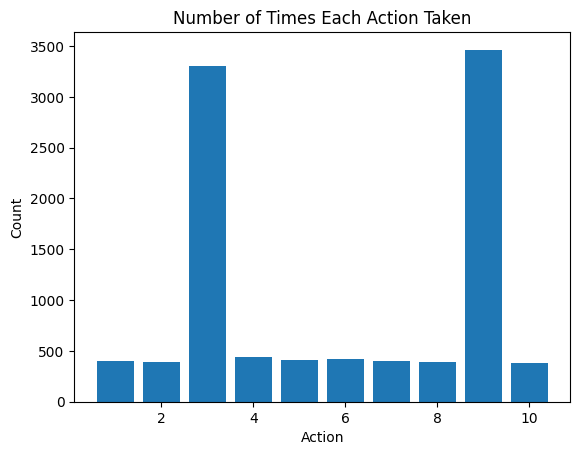

****************** RESULTS FOR BANDIT A *************************
Observed Average Reward for Action 1: 5.81040083845304
Actual Reward for Action 1: 5.690767978995215
----------------------------------------------------------------------------------
Observed Average Reward for Action 2: 6.916630817859252
Actual Reward for Action 2: 7.306311928763355
----------------------------------------------------------------------------------
Observed Average Reward for Action 3: 8.275478498733687
Actual Reward for Action 3: 8.351367011110957
----------------------------------------------------------------------------------
Observed Average Reward for Action 4: 7.340156741727628
Actual Reward for Action 4: 7.230258416121292
----------------------------------------------------------------------------------
Observed Average Reward for Action 5: 6.669543220379781
Actual Reward for Action 5: 6.801700383117448
----------------------------------------------------------------------------------
Observed A

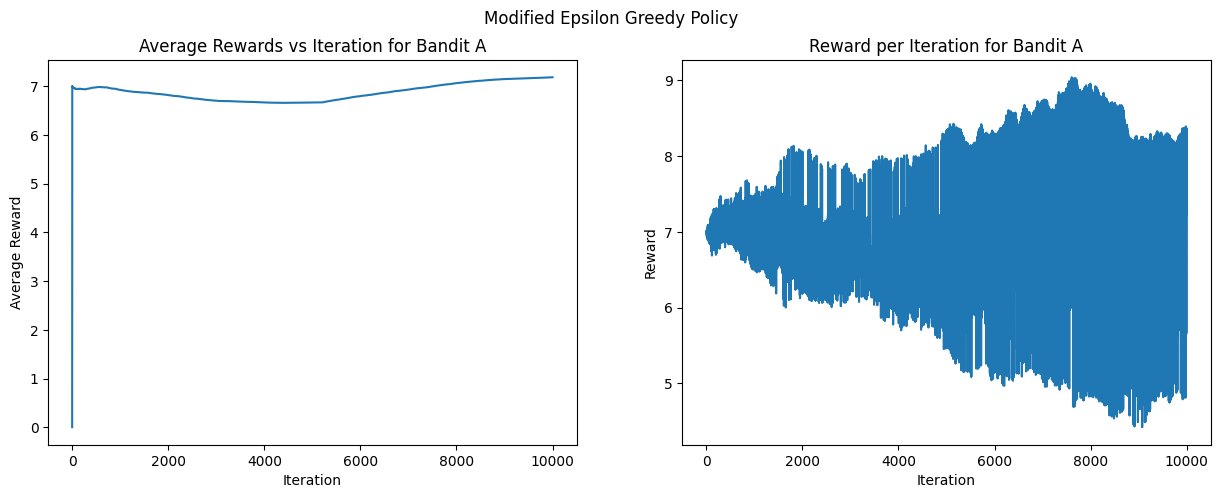

In [ ]:
import random
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, arms):
        self.arms = arms  # Number of arms
        self.expRewards = [7.0] * arms  # Initialize expected rewards

    def get_actions(self):
        return list(range(self.arms))  # Actions: 0 to arms-1

    def get_reward(self, action):
        # Incrementing the rewards at each step
        for i in range(self.arms):
            self.expRewards[i] += random.gauss(0, 0.01)  # Random walk for each arm
        return self.expRewards[action]  # Return the reward of the selected action

# --- Epsilon-Greedy Agent ---
def epsilon_greedy_agent(bandit, epsilon, steps, alpha):
    num_actions = bandit.arms
    Q_values = [0.0] * num_actions  # Initialize estimated rewards (Q-values)
    action_counts = [0] * num_actions  # Track the number of times each action is chosen
    rewards_history = []  # Store all rewards over steps
    avg_rewards_history = [0.0]  # Store the running average of rewards

    for t in range(1, steps + 1):
        # Epsilon-greedy decision
        if random.random() > epsilon:
            action = Q_values.index(max(Q_values))  # Exploit: choose best action
        else:
            action = random.choice(bandit.get_actions())  # Explore: choose a random action

        # Get the reward for the chosen action
        reward = bandit.get_reward(action)
        rewards_history.append(reward)
        action_counts[action] += 1

        # Update estimated Q-value using incremental formula
        Q_values[action] += alpha * (reward - Q_values[action])

        # Update running average reward
        avg_rewards_history.append(avg_rewards_history[t - 1] + (reward - avg_rewards_history[t - 1]) / t)

    # Plot the action counts
    plt.bar(range(1, num_actions + 1), action_counts)
    plt.title("Number of Times Each Action Taken")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.show()

    return Q_values, avg_rewards_history, rewards_history

# --- Simulation for Bandit A ---
random.seed(3)
bandit_A = Bandit(arms=10)  # Initialize bandit with 10 arms
Q_values_A, avg_rewards_A, rewards_A = epsilon_greedy_agent(bandit_A, epsilon=0.4, steps=10000, alpha=0.01)

# Print results for Bandit A
print("****************** RESULTS FOR BANDIT A *************************")
for i in range(1, bandit_A.arms + 1):
    print(f"Observed Average Reward for Action {i}: {Q_values_A[i-1]}")
    print(f"Actual Reward for Action {i}: {bandit_A.expRewards[i-1]}")
    print("----------------------------------------------------------------------------------")

# Plot reward trends for Bandit A
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(avg_rewards_A)
ax1.set_title("Average Rewards vs Iteration for Bandit A")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(rewards_A)
ax2.set_title("Reward per Iteration for Bandit A")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
fig.suptitle("Modified Epsilon Greedy Policy")
plt.show()
